<a href="https://colab.research.google.com/github/Medve82/Medve82.github.io/blob/main/Pyton_a_Colab_webhelyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adatvizualiz√°ci√≥ projekt 2025**
**f√©lk√∂v√©r sz√∂veg**

In [ ]:
!pip install streamlit


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.9/9.9 MB 38.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 56.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install yfinance

                                          Yahoo finance adatok beolvas√°sa

In [ ]:
import yfinance as yf
import pandas as pd

# Kript√≥k ticker szimb√≥lumai
symbols = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Dogecoin': 'DOGE-USD'
}

# √úres lista az adatok t√°rol√°s√°ra
crypto_data = []

# 5 √©vre let√∂ltj√ºk az adatokat mindh√°rom kript√≥ra
for name, ticker in symbols.items():
    df = yf.download(ticker, period='5y', interval='1d')
    df.reset_index(inplace=True)
    df['Crypto'] = name
    df['Date'] = pd.to_datetime(df['Date'])
    df['Price'] = df['Close']  # csak a z√°r√≥√°r kell
    crypto_data.append(df[['Date', 'Price', 'Crypto']])

# Az √∂sszes√≠tett DataFrame
combined_df = pd.concat(crypto_data, ignore_index=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                                          BITCOIN √ÅRFOLYAM ID≈êBELI ALAKUL√ÅSA

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# ‚Üí Colab-hoz renderer be√°ll√≠t√°sa
pio.renderers.default = "colab"

# 1) Adatok lek√©r√©se az elm√∫lt 5 √©vre
btc_data = yf.download('BTC-USD', period='5y', interval='1d')

# 2) Indexb≈ël oszlopp√° alak√≠t√°s (Date)
btc_data.reset_index(inplace=True)
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# 3) √Åtnevez√©s: a z√°r√≥√°r legyen 'Price' (ha szeretn√©d)
btc_data['Price'] = btc_data['Close']

# 4) Hover-sz√∂veg el≈ë√°ll√≠t√°sa k√©t l√©p√©sben, hogy ne keletkezzen hiba
btc_data['Date_str']  = btc_data['Date'].dt.strftime('%Y-%m-%d')
btc_data['Price_str'] = btc_data['Price'].map(lambda x: f"${x:,.2f}")
btc_data['hover_text'] = "D√°tum: " + btc_data['Date_str'] + "<br>Z√°r√≥√°r: " + btc_data['Price_str']

# 5) Interakt√≠v vonaldiagram Plotly-val
fig = go.Figure(
    go.Scatter(
        x=btc_data['Date'],
        y=btc_data['Price'],
        mode='lines',
        line=dict(color='darkorange', width=0.6),
        hovertext=btc_data['hover_text'],
        hoverinfo='text'
    )
)

# 6) Layout be√°ll√≠t√°sok
fig.update_layout(
    title="Bitcoin √°rfolyam id≈ëbeli alakul√°sa (Yahoo Finance)",
    xaxis_title="D√°tum",
    yaxis_title="Z√°r√≥√°r (USD)",
    template="simple_white",
    hovermode="x unified"
)

# 7) √Åbra megjelen√≠t√©se
fig.show()


[*********************100%***********************]  1 of 1 completed


                                         ETHEREUM

In [ ]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import plotly.io as pio

# Colab kompatibilit√°s
pio.renderers.default = "colab"

# 1) Ethereum adatok let√∂lt√©se (5 √©v)
eth_data = yf.download('ETH-USD', period='5y', interval='1d')

# 2) Indexb≈ël oszlop
eth_data.reset_index(inplace=True)

# 3) D√°tum biztos√≠t√°sa datetime t√≠pusban
eth_data['Date'] = pd.to_datetime(eth_data['Date'])

# 4) Z√°r√≥√°r hozz√°rendel√©se Price n√©ven
eth_data['Price'] = eth_data['Close']

# 5) Hover sz√∂veg el≈ë√°ll√≠t√°sa
eth_data['hover_text'] = (
    "D√°tum: " + eth_data['Date'].dt.strftime('%Y-%m-%d') +
    "<br>Z√°r√≥√°r: $" + eth_data['Price'].map('{:,.2f}'.format)
)

# 6) Interakt√≠v vonaldiagram Plotly-val
fig = go.Figure(go.Scatter(
    x=eth_data['Date'],
    y=eth_data['Price'],
    mode='lines',
    line=dict(color='steelblue', width=0.6),
    hovertext=eth_data['hover_text'],
    hoverinfo='text'
))

# 7) √Åbra be√°ll√≠t√°sok
fig.update_layout(
    title="Ethereum √°rfolyam id≈ëbeli alakul√°sa (Yahoo Finance)",
    xaxis_title="D√°tum",
    yaxis_title="Z√°r√≥√°r (USD)",
    template="simple_white",
    hovermode="x unified"
)

# 8) Megjelen√≠t√©s
fig.show()


[*********************100%***********************]  1 of 1 completed


                                      DOGECOIN

In [ ]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import plotly.io as pio

# Colab renderel√©s be√°ll√≠t√°sa (ha sz√ºks√©ges)
pio.renderers.default = "colab"

# 1) Dogecoin adatok let√∂lt√©se az elm√∫lt 5 √©vre
doge_data = yf.download('DOGE-USD', period='5y', interval='1d')

# 2) Indexb≈ël oszlop
doge_data.reset_index(inplace=True)
doge_data['Date'] = pd.to_datetime(doge_data['Date'])

# 3) Z√°r√≥√°r hozz√°rendel√©se
doge_data['Price'] = doge_data['Close']

# 4) Hover-sz√∂veg k√©sz√≠t√©se (4 tizedesjegy, ahogy k√©rted)
doge_data['hover_text'] = (
    "D√°tum: " + doge_data['Date'].dt.strftime('%Y-%m-%d') +
    "<br>Z√°r√≥√°r: $" + doge_data['Price'].map('{:,.4f}'.format)
)

# 5) Plotly √°bra l√©trehoz√°sa
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=doge_data['Date'],
    y=doge_data['Price'],
    mode='lines',
    line=dict(color='darkgreen', width=0.6),
    text=doge_data['hover_text'],
    hoverinfo='text'
))

# 6) √Åbra be√°ll√≠t√°sok
fig.update_layout(
    title="Dogecoin √°rfolyam id≈ëbeli alakul√°sa (Yahoo Finance)",
    xaxis_title="D√°tum",
    yaxis_title="Z√°r√≥√°r (USD)",
    template="simple_white",
    hovermode="x unified"
)

# 7) Megjelen√≠t√©s
fig.show()


[*********************100%***********************]  1 of 1 completed


       KRIPT√ìK √ñSSZEVON√ÅSA

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Plotly Colab megjelen√≠t√©s
pio.renderers.default = "colab"

# Kript√≥k √©s szimb√≥lumaik
symbols = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# Let√∂lt√©s √©s egys√©ges√≠t√©s
combined = []

for name, ticker in symbols.items():
    df = yf.download(ticker, period="5y", interval="1d")
    df.reset_index(inplace=True)
    df["Crypto"] = name
    df["Date"] = pd.to_datetime(df["Date"])
    df["Price"] = df["Close"]
    combined.append(df[["Date", "Price", "Crypto"]])

# Egyes√≠tett DataFrame
combined = pd.concat(combined, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                        14 napos sz√°zal√©kos v√°ltoz√°s sz√°m√≠t√°sa (rolling average)

In [ ]:
# D√°tum szerint rendez√©s
combined = combined.sort_values(by=["Crypto", "Date"])

# 14 napos v√°ltoz√°s f√ºggv√©ny
def compute_pct_rolling_avg(group):
    group = group.copy()
    group["RollingAvg"] = group["Price"].pct_change(periods=14) * 100
    return group

# Sz√°m√≠t√°s k√ºl√∂n-k√ºl√∂n kript√≥kra
combined_data_smooth = combined.groupby("Crypto").apply(compute_pct_rolling_avg).reset_index(drop=True)

fig = px.line(
    combined_data_smooth,
    x="Date",
    y="RollingAvg",
    color="Crypto",
    line_group="Crypto",
    hover_data={"Date": True, "Crypto": True, "RollingAvg": ':.2f'},
    title="üìâ 5 √©ves mozg√≥√°tlag ‚Äì √Årfolyamv√°ltoz√°s √∂sszehasonl√≠t√°s"
)

fig.update_traces(
    hovertemplate='<b>D√°tum:</b> %{x}<br>' +
                  '<b>Crypto:</b> %{customdata[1]}<br>' +
                  '<b>14 napos v√°ltoz√°s:</b> %{y:.2f}%<extra></extra>'
)

fig.update_layout(
    xaxis_title="D√°tum",
    yaxis_title="V√°ltoz√°s (%)",
    hovermode="x unified",
    template="plotly_white"
)

fig.show()


<ipython-input-13-2579832a4141>:11: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.

<ipython-input-13-2579832a4141>:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



                LOGARITM√ÅLT SK√ÅLA



In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Colabhoz: biztos√≠tjuk a grafikon megjelen√©s√©t
pio.renderers.default = "colab"

# 1) Kriptovalut√°k szimb√≥lumai
symbols = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# 2) Adatok let√∂lt√©se √©s el≈ëk√©sz√≠t√©se
data = []

for name, ticker in symbols.items():
    df = yf.download(ticker, period="5y", interval="1d")
    df.reset_index(inplace=True)
    df["Crypto"] = name
    df["Date"] = pd.to_datetime(df["Date"])
    df["Price"] = df["Close"]
    data.append(df[["Date", "Price", "Crypto"]])

# 3) √ñsszef≈±z√∂tt DataFrame
combined = pd.concat(data, ignore_index=True)

# 4) Normaliz√°l√°s az els≈ë √©rt√©khez k√©pest
combined_sorted = combined.sort_values(['Crypto', 'Date'])
combined_sorted['NormalizedPrice'] = (
    combined_sorted
    .groupby('Crypto')['Price']
    .transform(lambda x: x / x.iloc[0])
)

fig = px.line(
    combined_sorted,
    x='Date',
    y='NormalizedPrice',
    color='Crypto',
    line_shape='linear',
    title="Kriptovalut√°k √°rfolyam√°nak √∂sszehasonl√≠t√°sa (normaliz√°lva)",
    labels={
        'Date': 'D√°tum',
        'NormalizedPrice': 'Normaliz√°lt √°rfolyam (log sk√°la)',
        'Crypto': 'Kriptovaluta'
    },
)

fig.update_layout(
    yaxis_type='log',
    yaxis_tickformat='.0f',
    yaxis=dict(
        tickvals=[1, 15, 30, 60, 120, 240, 480],
    ),
    template='plotly_dark',
    font=dict(size=14),
    title=dict(
        text="Kriptovalut√°k √°rfolyam√°nak √∂sszehasonl√≠t√°sa (normaliz√°lva)<br><sup>Relat√≠v n√∂veked√©s 1-r≈ël indulva, logaritmikus sk√°l√°n</sup>",
        x=0.5
    ),
    legend=dict(
        title='Kriptovaluta',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='gray',
        borderwidth=1
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

# X tengely √©v szerint
fig.update_xaxes(tickformat='%Y')

fig.show()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.io as pio

# Plotly Colab renderer
pio.renderers.default = "colab"

# 1) Adatok let√∂lt√©se a h√°rom kript√≥ra
symbols = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

data = []

for name, ticker in symbols.items():
    df = yf.download(ticker, period="5y", interval="1d")
    df.reset_index(inplace=True)
    df["Crypto"] = name
    df["Date"] = pd.to_datetime(df["Date"])
    df["Price"] = df["Close"]
    df["Vol_numeric"] = df["Volume"]  # M√°r numerikus!
    data.append(df[["Date", "Price", "Vol_numeric", "Crypto"]])

# √ñsszef≈±z√©s
combined = pd.concat(data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# √âv √©s h√≥nap kiszed√©se
combined["Year"] = combined["Date"].dt.year
combined["Month"] = combined["Date"].dt.month_name()

# Csak Bitcoin √©s Ethereum
btc_eth = combined[combined["Crypto"].isin(["Bitcoin", "Ethereum"])].copy()

# Volumen ezres nagys√°grendbe
btc_eth["Vol_K"] = btc_eth["Vol_numeric"] / 1e3

# H√≥nap sorrend biztos√≠t√°sa
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
btc_eth["Month"] = pd.Categorical(btc_eth["Month"], categories=month_order, ordered=True)

# √Åtlagos havi volumen sz√°m√≠t√°s
heatmap_data = (
    btc_eth.groupby(["Crypto", "Year", "Month"], as_index=False)["Vol_K"]
    .mean()
)


<ipython-input-21-188a9b2ca64f>:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.express as px
import yfinance as yf

# Kript√≥k szimb√≥lumai
symbols = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# Adatok let√∂lt√©se √©s el≈ëk√©sz√≠t√©se
combined = []
for name, ticker in symbols.items():
    df = yf.download(ticker, period="5y", interval="1d")
    df.reset_index(inplace=True)
    df["Crypto"] = name
    df["Date"] = pd.to_datetime(df["Date"])
    df["Price"] = df["Close"]
    df["Volume_K"] = df["Volume"] / 1e3  # Volumen K-ban (ezer USD)
    df["Month"] = df["Date"].dt.month_name()
    df["Year"] = df["Date"].dt.year
    combined.append(df[["Date", "Price", "Volume_K", "Crypto", "Month", "Year"]])

combined_df = pd.concat(combined, ignore_index=True)

# √Åtlagos havi forgalom kisz√°m√≠t√°sa Bitcoin √©s Ethereum eset√©n
heatmap_data = combined_df[combined_df["Crypto"].isin(["Bitcoin", "Ethereum"])].copy()
heatmap_data = (
    heatmap_data.groupby(["Crypto", "Year", "Month"], as_index=False)["Volume_K"]
    .mean()
)

# H≈ët√©rk√©p - Bitcoin √©s Ethereum
fig1 = px.density_heatmap(
    heatmap_data,
    x="Month",
    y="Year",
    z="Volume_K",
    facet_col="Crypto",
    color_continuous_scale="YlGnBu",
    title="üìä √Åtlagos havi forgalom (K USD) ‚Äì Bitcoin vs Ethereum",
    labels={"Volume_K": "Forgalom (K USD)"}
)

fig1.update_layout(
    template="simple_white",
    title_x=0.5,
    font=dict(size=13),
    margin=dict(t=80, l=60, r=40, b=50)
)

fig1.show()

# H≈ët√©rk√©p - Dogecoin
heatmap_doge = combined_df[combined_df["Crypto"] == "Dogecoin"].copy()
heatmap_doge = (
    heatmap_doge.groupby(["Year", "Month"], as_index=False)["Volume_K"]
    .mean()
)

fig2 = px.density_heatmap(
    heatmap_doge,
    x="Month",
    y="Year",
    z="Volume_K",
    color_continuous_scale="YlGnBu",
    title="üìä √Åtlagos havi forgalom (K USD) ‚Äì Dogecoin",
    labels={"Volume_K": "Forgalom (K USD)"}
)

fig2.update_layout(
    template="simple_white",
    title_x=0.5,
    font=dict(size=13),
    margin=dict(t=80, l=60, r=40, b=50)
)

fig2.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                              FORGALOM ID≈êBELI ALAKUL√ÅSA

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "colab"  # Colabhoz (ha ott futtatod)

# 1. Kript√≥k √©s szimb√≥lumok
symbols = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

# 2. Adatok lek√©r√©se √©s el≈ëk√©sz√≠t√©se
data = []
for name, ticker in symbols.items():
    df = yf.download(ticker, period="5y", interval="1d")
    df.reset_index(inplace=True)
    df["Crypto"] = name
    df["Date"] = pd.to_datetime(df["Date"])
    df["Price"] = df["Close"]
    df["Vol_numeric"] = df["Volume"]
    data.append(df[["Date", "Price", "Vol_numeric", "Crypto"]])

# 3. √ñsszef≈±z√©s
combined = pd.concat(data, ignore_index=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
fig = px.area(
    combined,
    x='Date',
    y='Vol_numeric',
    facet_col='Crypto',
    facet_col_wrap=3,
    color_discrete_sequence=['skyblue'],
    title="Forgalom id≈ëbeli alakul√°sa ‚Äì kriptovalut√°k szerint bontva",
    labels={
        'Date': 'D√°tum',
        'Vol_numeric': 'Forgalom (USD)',
        'Crypto': 'Kriptovaluta'
    }
)

# √Åtl√°tsz√≥s√°g + legend elt√ºntet√©s
fig.update_traces(opacity=0.6, showlegend=False)

# Layout √©s tengelyek finomhangol√°sa
fig.update_layout(
    template='simple_white',
    font=dict(size=14),
    title=dict(
        text="Forgalom id≈ëbeli alakul√°sa ‚Äì kriptovalut√°k szerint bontva",
        x=0.5,
        font=dict(size=20)
    ),
    margin=dict(t=80, b=60, l=60, r=40),
    hovermode="x unified"
)

# X √©s Y tengely be√°ll√≠t√°sok
fig.update_xaxes(
    tickformat="%Y",
    title="D√°tum",
    tickangle=45,
    showgrid=True
)

fig.update_yaxes(
    title="Forgalom (USD)",
    tickformat=".2s",  # Pl. 1M, 500K, stb.
    showgrid=True
)

fig.show()


                                        GYERTYA DIAGRAMMOK

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Colab eset√©n (vagy Jupyter Notebookban) ez kell a Plotly-hoz:
pio.renderers.default = "colab"

# A h√°rom kripto szimb√≥lumai √©s emberi neveik
cryptos = {
    "Bitcoin": "BTC-USD",
    "Ethereum": "ETH-USD",
    "Dogecoin": "DOGE-USD"
}

for name, ticker in cryptos.items():
    # 1) Adatok let√∂lt√©se 5 √©vre
    df = yf.download(ticker, period="5y", interval="1d")

    # 2) Date oszlopp√° hoz√°s √©s rendez√©s
    df.reset_index(inplace=True)
    df = df.sort_values("Date")

    # 3) Ha MultiIndex az oszlop, egyszer≈±s√≠tj√ºk (t√∂bbes tuple -> csak az els≈ë elem)
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

    # 4) Gyertyadiagram fel√©p√≠t√©se
    fig = go.Figure(data=[go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name=name
    )])

    # 5) Layout be√°ll√≠t√°sok
    fig.update_layout(
        title=f"{name} √°rfolyam ‚Äì gyertyadiagram (Yahoo Finance)",
        xaxis_title="D√°tum",
        yaxis_title="√År (USD)",
        xaxis_rangeslider_visible=False,
        template='plotly_white'
    )

    # 6) Megjelen√≠t√©s
    fig.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [ ]:
import plotly.express as px

# Piaci kapitaliz√°ci√≥ √©s forgalom (p√©ld√°ul USD-ben)
combined_df['MarketCap'] = combined_df['Price'] * combined_df['Volume_K']

# Scatter plot
fig = px.scatter(
    combined_df,
    x="MarketCap",
    y="Volume_K",
    color="Crypto",
    title="Piaci kapitaliz√°ci√≥ √©s forgalom √∂sszehasonl√≠t√°sa",
    labels={"MarketCap": "Piaci kapitaliz√°ci√≥ (USD)", "Volume_K": "Forgalom (K USD)"}
)

fig.update_layout(template="plotly_white")
fig.show()


Itt l√°thatjuk, hogyan v√°ltozik a piaci kapitaliz√°ci√≥ a forgalom f√ºggv√©ny√©ben.

Lehet≈ëv√© teszi az egyes kriptovalut√°k gazdas√°gi erej√©nek √∂sszehasonl√≠t√°s√°t.

In [ ]:
# 30 napos √©s 90 napos mozg√≥√°tlagok sz√°m√≠t√°sa
combined_df['SMA_30'] = combined_df.groupby('Crypto')['Price'].transform(lambda x: x.rolling(window=30).mean())
combined_df['SMA_90'] = combined_df.groupby('Crypto')['Price'].transform(lambda x: x.rolling(window=90).mean())

# √Åbr√°zol√°s
fig = px.line(
    combined_df,
    x="Date",
    y=["Price", "SMA_30", "SMA_90"],
    color="Crypto",
    title="30 √©s 90 napos mozg√≥√°tlagok",
    labels={"Price": "√År (USD)", "SMA_30": "30 napos mozg√≥√°tlag", "SMA_90": "90 napos mozg√≥√°tlag"}
)

fig.update_layout(template="plotly_white")
fig.show()


Az SMA-k (pl. 30 napos √©s 90 napos) seg√≠thetnek az √°rfolyam zaj√°nak kisz≈±r√©s√©ben √©s a hossz√∫ t√°v√∫ trendek azonos√≠t√°s√°ban.

Az √°rfolyamok mozg√≥√°tlag√°val val√≥ √∂sszehasonl√≠t√°s seg√≠thet meghat√°rozni, hogy egy kriptovaluta t√∫l√©rt√©kelt vagy alul√©rt√©kelt-e.

In [ ]:
# Volatilit√°s (standard deviation) sz√°m√≠t√°sa
combined_df['Volatility'] = combined_df.groupby('Crypto')['Price'].transform(lambda x: x.pct_change().rolling(window=30).std())

# √Åbr√°zol√°s
fig = px.line(
    combined_df,
    x="Date",
    y="Volatility",
    color="Crypto",
    title="30 napos volatilit√°s",
    labels={"Volatility": "Volatilit√°s (%)"}
)

fig.update_layout(template="plotly_white")
fig.show()


A kriptovalut√°k piac√°n a volatilit√°s az egyik legfontosabb t√©nyez≈ë. A standard deviation (SD) seg√≠ts√©g√©vel megm√©rhetj√ºk a piaci ingadoz√°sokat.

Mi√©rt hasznos?

Megmutatja, hogy a piacon mennyire ingadozik az √°rfolyam.

A magas volatilit√°s jelezhet nagy kock√°zatot, m√≠g az alacsony volatilit√°s stabilit√°st.

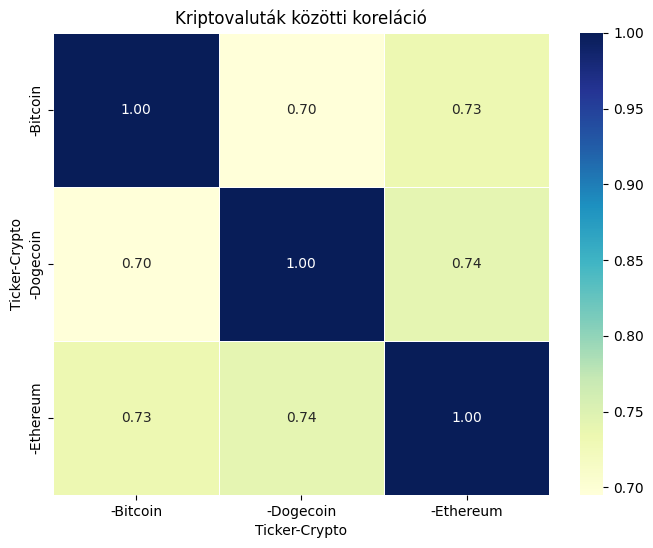

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot t√°bla l√©trehoz√°sa az √°rfolyamokkal
pivot_df = combined_df.pivot_table(index="Date", columns="Crypto", values="Price")

# Korel√°ci√≥s m√°trix sz√°m√≠t√°sa
corr = pivot_df.corr()

# H≈ët√©rk√©p √°br√°zol√°sa
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Kriptovalut√°k k√∂z√∂tti korel√°ci√≥")
plt.show()


Ez a vizualiz√°ci√≥ seg√≠thet meg√©rteni, hogy a k√ºl√∂nb√∂z≈ë kriptovalut√°k hogyan viselkednek egym√°ssal kapcsolatban az √°rfolyam szempontj√°b√≥l. A korel√°ci√≥ mutatja meg, hogy egyes kript√≥k √°rfolyama hogyan v√°ltozik egyidej≈±leg.